# Working with evolutionary models

In this tutorial, we will work with evolutionary data and extract an isochrone and cooling by interpolating the data at a fixed age and mass, respectively.

## Getting started

We start by importing `matplotlib`, `numpy`, and `species`.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import species

Next, we initiate the workflow by calling the [SpeciesInit](https://species.readthedocs.io/en/latest/species.core.html#species.core.init.SpeciesInit) class. This will create both the [HDF5 database](https://species.readthedocs.io/en/latest/database.html) and the [configuration file](https://species.readthedocs.io/en/latest/configuration.html) in the working folder.

In [2]:
species.SpeciesInit()

Initiating species v0.5.3... [DONE]
Creating species_config.ini... [DONE]
Database: /Users/tomasstolker/applications/species/docs/tutorials/species_database.hdf5
Data folder: /Users/tomasstolker/applications/species/docs/tutorials/data
Working folder: /Users/tomasstolker/applications/species/docs/tutorials
Grid interpolation method: linear
Creating species_database.hdf5... [DONE]
Creating data folder... [DONE]


Now we will create and instance of [Database](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database) that will provide read and write access to the [HDF5 database](https://species.readthedocs.io/en/latest/database.html) where all the data will be stored.

In [3]:
database = species.Database()

There are several evolutionary models supported by `species`. In this example, we will use the *AMES-Cond* models that can be added with the [add_isochrones](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database.add_isochrones) method of [Database](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database). See the documentation of this method for a description of all the parameters and a list of other evolutionary models that can be used. By using `model='ames'`, it will download and add both the *AMES-Cond* and *AMES-Dusty* isochrones, including the magnitudes in the MKO filter system. For magnitudes from other filters, it is possible to use any of the isochrone files from [https://phoenix.ens-lyon.fr/Grids/](https://phoenix.ens-lyon.fr/Grids/) and add these to the database by setting `model='manual'`.

In [4]:
database.add_isochrones(model='ames')

Adding isochrones: ames-cond... [DONE]
Database tag: ames-cond
Adding isochrones: ames-dusty... [DONE]
Database tag: ames-dusty


## Extracting an isochrone

We can now read the evolutionary data from the database by creating an instance of [ReadIsochrone](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_isochrone.ReadIsochrone) and providing the `tag` by which the data was stored in the database with [add_isochrones](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database.add_isochrones). We will use the *AMES-COND* isochrones which were calculated with a cloudless atmosphere as boundary condition of the interior structure.

In [5]:
read_iso = species.ReadIsochrone(tag='ames-cond')

The [ReadIsochrone](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_isochrone.ReadIsochrone) has several functionalities. There is a complete list of methods and parameters in the class documentation. For example, the [get_isochrone](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_isochrone.ReadIsochrone.get_isochrone) can be used to interpolate the evolutionary data at a fixed age and a range of masses (i.e. an isochrones). We can also optionally interpolate the magnitudes and/or colors. For this, we need to provide the filter name as is provided in the original file with evolutionary data. When setting an incorrect value to `filter_color` or `filter_mag`, an error message will be printed with the available filter names.

In [6]:
iso_box = read_iso.get_isochrone(age=50.,
                                 masses=np.linspace(5., 50., 25),
                                 filters_color=None,
                                 filter_mag='H')

The isochrone that is returned by [get_isochrone](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_isochrone.ReadIsochrone.get_isochrone) is stored in an [IsochroneBox](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.IsochroneBox). We can use the [open_box](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.Box.open_box) method on any [Box](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.Box) object to have a look at the content.

In [7]:
iso_box.open_box()

Opening IsochroneBox...
model = ames-cond
age = 50.0
filters_color = None
filter_mag = H
color = None
magnitude = [16.00849832 15.08270799 14.30385387 13.56028694 12.24563169 11.4973235
 10.99754006 11.06233314 11.12712623 11.08893104 10.94466799 10.80040493
 10.65614188 10.51187883 10.36761577 10.27003562 10.17732065 10.08460569
  9.99189072  9.89917576  9.81113688  9.73309881  9.65506073  9.57702265
  9.49898457]
log_lum = [-5.38313548 -5.05431799 -4.78767605 -4.53293343 -4.06756874 -3.77443326
 -3.57717019 -3.60222829 -3.62728639 -3.61090229 -3.55183677 -3.49277125
 -3.43370573 -3.37464021 -3.3155747  -3.27271852 -3.23155164 -3.19038477
 -3.14921789 -3.10805101 -3.0685949  -3.03279762 -2.99700033 -2.96120305
 -2.92540577]
teff = [ 737.83769359  889.52951155 1036.45246604 1195.87737192 1508.20867285
 1739.87929313 1903.61458756 1905.76242459 1907.91026162 1938.71493685
 1999.03336001 2059.35178317 2119.67020633 2179.98862949 2240.30705265
 2283.92985561 2325.81267762 2367.69549964 24

The attributes from a [Box](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.Box) can be simply extracted as a regular *Python* object. For example, to extract the age at which the isochrone was interpolated:

In [8]:
print(iso_box.age)

50.0


Lets create a plot of the bolometric luminosity as function of mass.

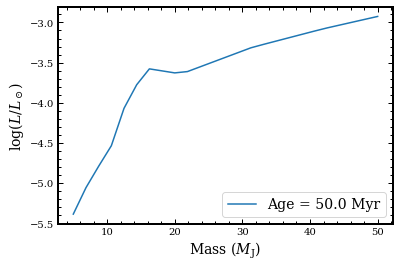

In [9]:
plt.plot(iso_box.masses, iso_box.log_lum, label=f'Age = {iso_box.age} Myr')
plt.xlabel(r'Mass ($M_\mathrm{J}$)', fontsize=14)
plt.ylabel(r'$\log(L/L_\odot)$', fontsize=14)
plt.legend(loc='lower right', fontsize=14)
plt.show()

## Extracting a cooling curve

Similarly, we can extract a cooling curve with the [get_cooling_curve](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_isochrone.ReadIsochrone.get_cooling_curve), which will interpolate the evolutionary data at a fixed mass and a range of ages. Instead of providing an `numpy` array with ages, we can also set the argument of `ages` to `None`. In that case it use the ages that are available in the original data.

In [10]:
cooling_box = read_iso.get_cooling_curve(mass=10.,
                                         ages=None,
                                         filters_color=None,
                                         filter_mag=None)

The cooling curve that is returned by [get_cooling_curve](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_isochrone.ReadIsochrone.get_cooling_curve) is stored in an [CoolingBox](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.CoolingBox). Lets have a look at the content by again using the [open_box](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.Box.open_box) method.

In [11]:
cooling_box.open_box()

Opening CoolingBox...
model = ames-cond
mass = 10.0
filters_color = None
filter_mag = None
color = None
magnitude = None
ages = [1.0e+00 2.0e+00 3.0e+00 4.0e+00 5.0e+00 6.0e+00 7.0e+00 8.0e+00 9.0e+00
 1.0e+01 2.0e+01 3.0e+01 4.0e+01 5.0e+01 6.0e+01 7.0e+01 8.0e+01 9.0e+01
 1.0e+02 1.2e+02 1.5e+02 2.0e+02 3.0e+02 4.0e+02 5.0e+02 6.0e+02 7.0e+02
 8.0e+02 9.0e+02 1.0e+03 2.0e+03 3.0e+03 4.0e+03 5.0e+03 6.0e+03 7.0e+03
 8.0e+03 9.0e+03 1.0e+04 1.2e+04]
log_lum = [-2.76632461 -3.01632461 -3.18086519 -3.30540577 -3.40540577 -3.49994634
 -3.56994634 -3.64994634 -3.69994634 -3.75448692 -4.1290275  -4.3490275
 -4.5090275  -4.63356807 -4.72356807 -4.81356807 -4.90356807 -4.97356807
 -5.03448692 -5.1490275  -5.26356807 -5.40994634 -5.6190275  -5.7790275
 -5.90540577 -5.99540577 -6.08994634 -6.15540577 -6.21086519 -6.28086519
 -6.61086519 -6.80086519 -6.93994634 -7.05994634 -7.15632461 -7.23086519
 -7.29540577 -7.35540577 -7.41540577 -7.51540577]
teff = [2231.02146295 2147.934944   2067.30784846 

Lets create a plot of the bolometric luminosity as function of time.

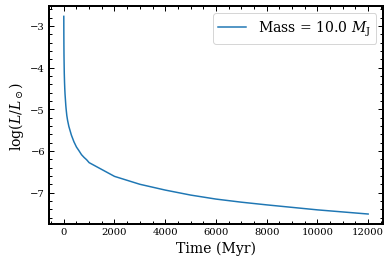

In [12]:
plt.plot(cooling_box.ages, cooling_box.log_lum, label=f'Mass = {cooling_box.mass}'+r' $M_\mathrm{J}$')
plt.xlabel(r'Time (Myr)', fontsize=14)
plt.ylabel(r'$\log(L/L_\odot)$', fontsize=14)
plt.legend(loc='upper right', fontsize=14)
plt.show()